In [84]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import TextVectorization
from keras.utils import pad_sequences

In [85]:
df=pd.read_csv('/content/all-data.csv',encoding='latin-1',names=['Sentiments','News'])
df

,Sentiments,News
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentiments  4846 non-null   object
 1   News        4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [87]:
df.columns

Index(['Sentiments', 'News'], dtype='object')

In [88]:
df.describe

<bound method NDFrame.describe of      Sentiments                                               News
0       neutral  According to Gran , the company has no plans t...
1       neutral  Technopolis plans to develop in stages an area...
2      negative  The international electronic industry company ...
3      positive  With the new production plant the company woul...
4      positive  According to the company 's updated strategy f...
...         ...                                                ...
4841   negative  LONDON MarketWatch -- Share prices ended lower...
4842    neutral  Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843   negative  Operating profit fell to EUR 35.4 mn from EUR ...
4844   negative  Net sales of the Paper segment decreased to EU...
4845   negative  Sales in Finland decreased by 10.5 % in Januar...

[4846 rows x 2 columns]>

In [89]:
df.isnull().sum()

Sentiments    0
News          0
dtype: int64

In [90]:
import plotly.express as px
fig = px.pie(df, names='Sentiments', title ='Pie chart')
fig.show()

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt


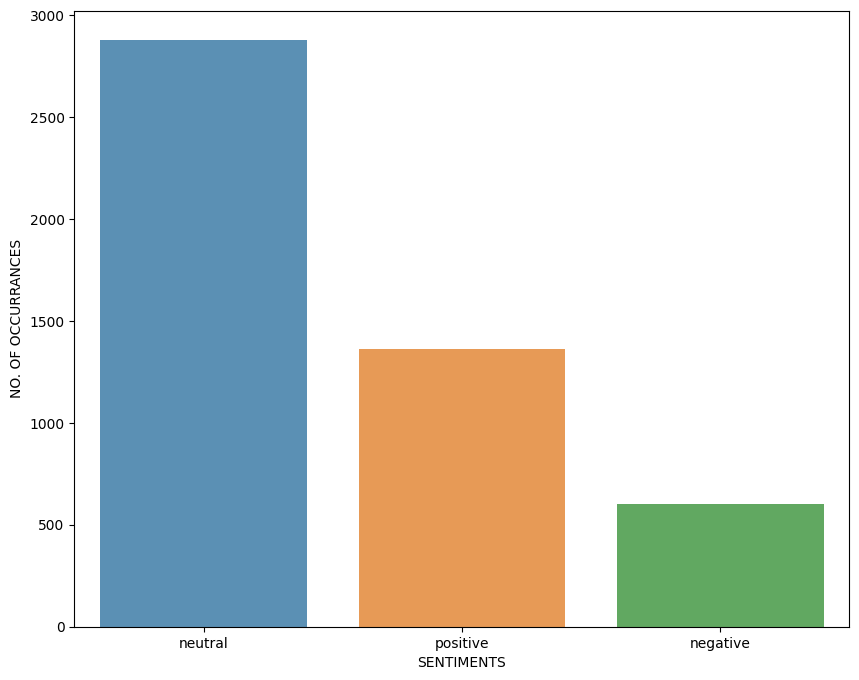

In [92]:
sentiment = df['Sentiments'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x=sentiment.index, y=sentiment.values, alpha=0.8)
plt.ylabel('NO. OF OCCURRANCES')
plt.xlabel('SENTIMENTS')
plt.show();

In [93]:
df['len'] = list(map(lambda x: len(str(x).split(' ')),df['News']))
df.head()

,Sentiments,News,len
0,neutral,"According to Gran , the company has no plans t...",25
1,neutral,Technopolis plans to develop in stages an area...,31
2,negative,The international electronic industry company ...,36
3,positive,With the new production plant the company woul...,33
4,positive,According to the company 's updated strategy f...,41


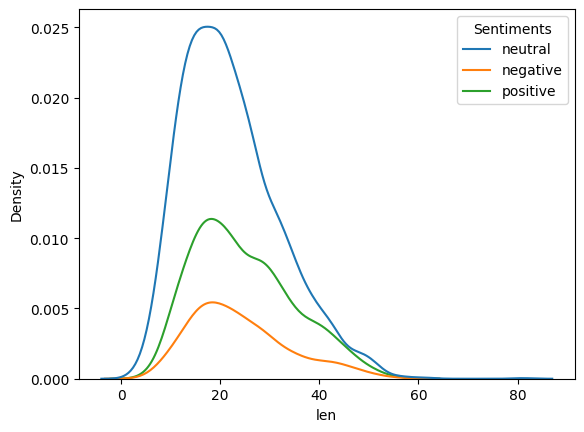

In [94]:
sns.kdeplot(x='len',hue='Sentiments',data=df)
plt.show()


In [95]:
#Sentiments  = {'positive': 0,'neutral': 1,'negative':2} 
#df.Sentiments = [Sentiments[item] for item in df.Sentiments] 
#df

In [96]:
import re
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text

In [97]:
df['News'] = df['News'].apply(cleanText)
df.head()

<ipython-input-96-b8c6549a5139>:4: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



,Sentiments,News,len
0,neutral,"according to gran , the company has no plans t...",25
1,neutral,technopolis plans to develop in stages an area...,31
2,negative,the international electronic industry company ...,36
3,positive,with the new production plant the company woul...,33
4,positive,according to the company 's updated strategy f...,41


In [98]:
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence 
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# load the stop words
stop_words = set(stopwords.words('english'))

stop_words.update([",",".","br","<",">","!","?",";","'"])


def remove_stopwords(text):
  # example text

  # convert the text to lower case
  text = text.lower()

  # split the text into words
  words = text.split()

  # remove the stop words
  filtered_words = [word for word in words if word not in stop_words]

  # join the filtered words back into a sentence
  filtered_text = ' '.join(filtered_words)

  return filtered_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


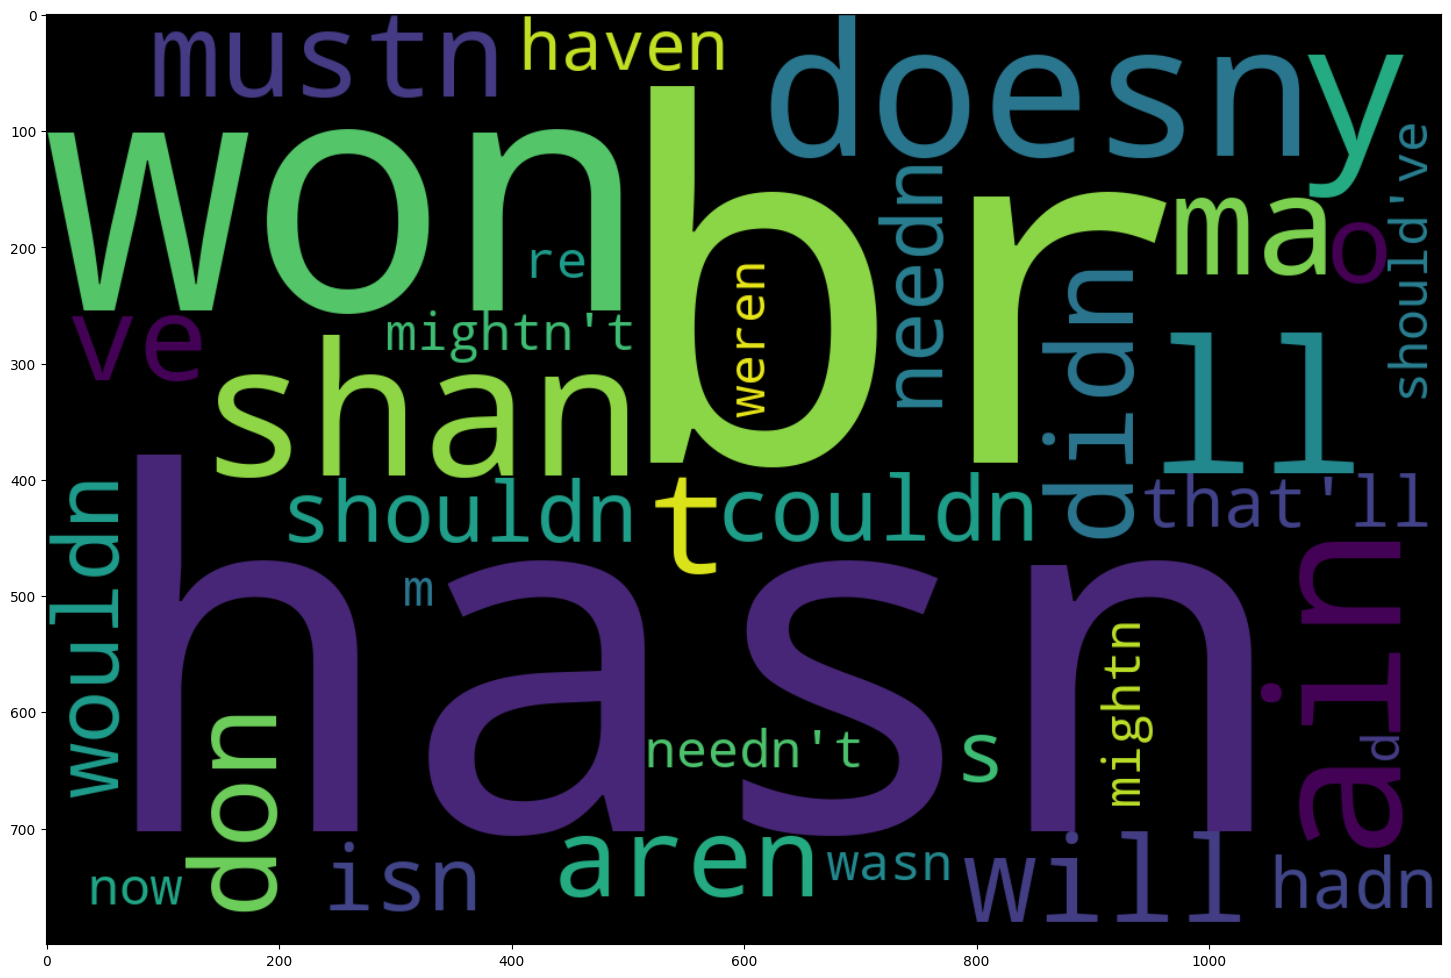

In [99]:
from wordcloud import WordCloud, STOPWORDS
stop_words
plt.figure(figsize = (18,24)) # Text Reviews with neutral Ratings
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(stop_words))
plt.imshow(wordcloud,interpolation = 'bilinear')

In [100]:
df['News'] = df['News'].apply(remove_stopwords)

In [101]:
df['News'][0]

'according gran company plans move production russia although company growing'

In [102]:
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [103]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk import pos_tag
lemmatizer = WordNetLemmatizer()
def clean_review(text):
    clean_text = []
    for w in word_tokenize(text):
        if w.lower() not in stop_words:
            pos = pos_tag([w])
            new_w = lemmatizer.lemmatize(w, pos=get_simple_pos(pos[0][1]))
            clean_text.append(new_w)
    return clean_text

def join_text(text):
    return " ".join(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [104]:
df['News'] = df['News'].apply(clean_review)
df['News'] = df['News'].apply(join_text)


In [105]:
df['News'][0]

'accord gran company plan move production russia although company grow'

In [106]:
Sentiments  = {'positive': 0,'neutral': 1,'negative':2} 
df.Sentiments = [Sentiments[item] for item in df.Sentiments] 
df

,Sentiments,News,len
0,1,accord gran company plan move production russi...,25
1,1,"technopolis plan develop stage area less 100,0...",31
2,2,international electronic industry company elco...,36
3,0,new production plant company would increase ca...,33
4,0,accord company 's update strategy year 2009-20...,41
...,...,...,...
4841,2,london marketwatch -- share price end low lond...,26
4842,1,rinkuskiai 's beer sale fell 6.5 per cent 4.16...,30
4843,2,operating profit fell eur 35.4 mn eur 68.8 mn ...,23
4844,2,net sale paper segment decrease eur 221.6 mn s...,44


In [107]:
df.head()

,Sentiments,News,len
0,1,accord gran company plan move production russi...,25
1,1,"technopolis plan develop stage area less 100,0...",31
2,2,international electronic industry company elco...,36
3,0,new production plant company would increase ca...,33
4,0,accord company 's update strategy year 2009-20...,41


In [108]:
reviewData = df['News']


In [109]:
max_len = 10000 
max_tokens = 10000
vectorizer = TextVectorization(max_tokens=max_tokens, output_mode='tf_idf',
                               standardize='lower_and_strip_punctuation', split='whitespace', ngrams=(1, 2))
vectorizer.adapt(reviewData)

In [110]:
X = vectorizer(df["News"])

vocabulary = vectorizer.get_vocabulary()

print(vocabulary)
print(X)

['[UNK]', 'eur', 's', 'company', 'say', 'mn', 'finnish', 'sale', 'net', 'million', 'share', 'profit', 'service', 'finland', 'group', 'year', 'operating', '2009', 'mln', 'market', 'business', '2008', 'new', 'period', 'total', 'net sale', '2007', 'quarter', 'oyj', '2010', 'increase', 'euro', 'also', 'operating profit', 'include', 'first', 'product', 'contract', '2006', 'solution', 'operation', 'helsinki', 'loss', 'compare', 'order', 'today', 'plant', 'technology', 'bank', 'report', 'system', 'nokia', 'customer', 'company s', 'unit', 'mobile', 'investment', 'financial', 'production', 'corporation', 'per', 'mn eur', 'make', 'project', 'correspond', 'agreement', 'percent', 'accord', 'rise', 'result', 'hel', 'use', 'well', 'provide', 'value', 'price', 'capital', 'mln euro', 'construction', 'correspond period', 'industry', '2005', 'stock', 'total eur', 'start', 'pct', 'part', 'network', 'oy', 'board', 'paper', 'building', 'area', 'one', 'net profit', 'would', 'sell', 'om', 'end', 'development

In [111]:
# from sklearn.model_selection import train_test_split
# #train, test = train_test_split(df, test_size=0.2 , random_state=42)
# x_train,x_test,y_train,y_test = train_test_split(df.News,df.Sentiments,test_size = 0.2 , random_state = 0)

In [112]:
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

In [117]:
import keras
import tensorflow as tf
from keras import layers
from keras.layers import LSTM
from keras.layers import Embedding


model = Sequential()
model.add(Embedding(5000, 32, input_length=X.shape[1]))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 10000, 32)         160000    
                                                                 
 lstm_6 (LSTM)               (None, 100)               53200     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [118]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [119]:
X = np.array(X).astype(int)

labels = np.array(df["Sentiments"]).astype(int)

print(X.shape)
print(labels.shape)

(4846, 10000)
(4846,)


In [ ]:
model.fit(X, labels, batch_size=64, epochs=5)


Epoch 1/5
 6/76 [=>............................] - ETA: 34:16 - loss: 0.6570 - accuracy: 0.6042